<a href="https://colab.research.google.com/github/vgudur/machine-learning-learning-path-labs/blob/patch-3/linear-regression/Vijji_Gudur_Linear_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression of House Sales data

### Overview
    Data: house-sales-full.csv
    Label is : SalePrice
    Input features : Start with Bedrooms, Bathrooms, SqFtTotLiving, SqFtLot
    Run linear regression
    What is the R2 you are getting?
    Can you reason why the R2 is low?
    Add more features to input and see if you can improve the score
    What is the maximum R2 you can attain? With what features?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

sns.set()
pd.set_option('display.float_format', lambda x: '%.5f' % x)

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
from scipy.stats import norm

## Step 1 - Load Data

In [ ]:
house_sales = pd.read_csv('https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-simplified.csv')
house_sales.head()

,ID,Date,SalePrice,PropertyID,PropertyType,Bedrooms,Bathrooms,SqFtTotLiving,SqFtLot,YrBuilt,ZipCode
0,1,9/16/14,280000,1000102,Multiplex,6,3.00000,2400,9373,1991,98002
1,2,6/16/06,1000000,1200013,Single Family,4,3.75000,3764,20156,2005,98166
2,3,1/29/07,745000,1200019,Single Family,4,1.75000,2060,26036,1947,98166
3,4,2/25/08,425000,2800016,Single Family,5,3.75000,3200,8618,1966,98168
4,5,3/29/13,240000,2800024,Single Family,4,1.75000,1720,8620,1948,98168


## Step 2 - Exploratory Data Analytics (EDA)
Do some basic plots ..etc

In [ ]:
##X = extract all columns except `SalePrice`
##y = extract `SalePrice` column
col_names = house_sales.select_dtypes([np.number]).columns.tolist()
x_cols = col_names.copy()
x_cols.remove('ID')
x_cols.remove('PropertyID')
x_cols.remove('ZipCode')
x_cols.remove('YrBuilt')

Distibution of all numerical features 




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4672291710>,
      dtype=object)

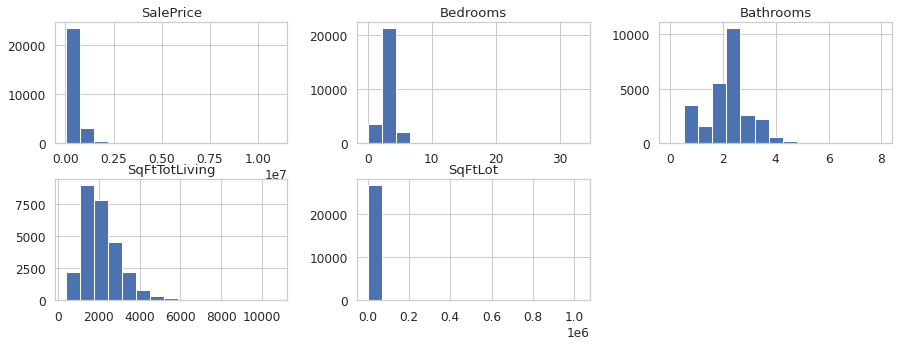

In [ ]:
df_copy1 = pd.DataFrame ( house_sales, columns=list(x_cols))
print ( 'Distibution of all numerical features \n\n' ) 
## see the frequency of all numerical columns and outliers
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 11]})
## distribution of all numerica columns
##df_house[num_features].hist(bins=10, figsize=(10, 5), layout=(3, 3))
df_copy1.hist(bins=15, figsize=(15, 8), layout=(3, 3))

In [ ]:
def plot_Sale_Price_by_Variable(dset , variables):
  listsize = len( variables)
  ncol = 2
  if (  listsize < ncol ):
    ncol = listsize
  nrow = round(len(variables)// ncol )
  print ( " Plot  {0} of  size {1} in col: {2} and rows: {3}" .format( variables, listsize,  ncol , nrow) )

  fig, axes_types = plt.subplots(nrows= nrow , ncols= ncol, sharex=False, sharey=True, squeeze=True, figsize=(20,11))
  for i, ax in enumerate(fig.axes):
      if i <  listsize:
          ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
          xlabel = variables[i]
          sns.scatterplot(x= xlabel , y='SalePrice', data=dset, ax=ax)
  fig.tight_layout()

 Plot  ['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot'] of  size 4 in col: 2 and rows: 2


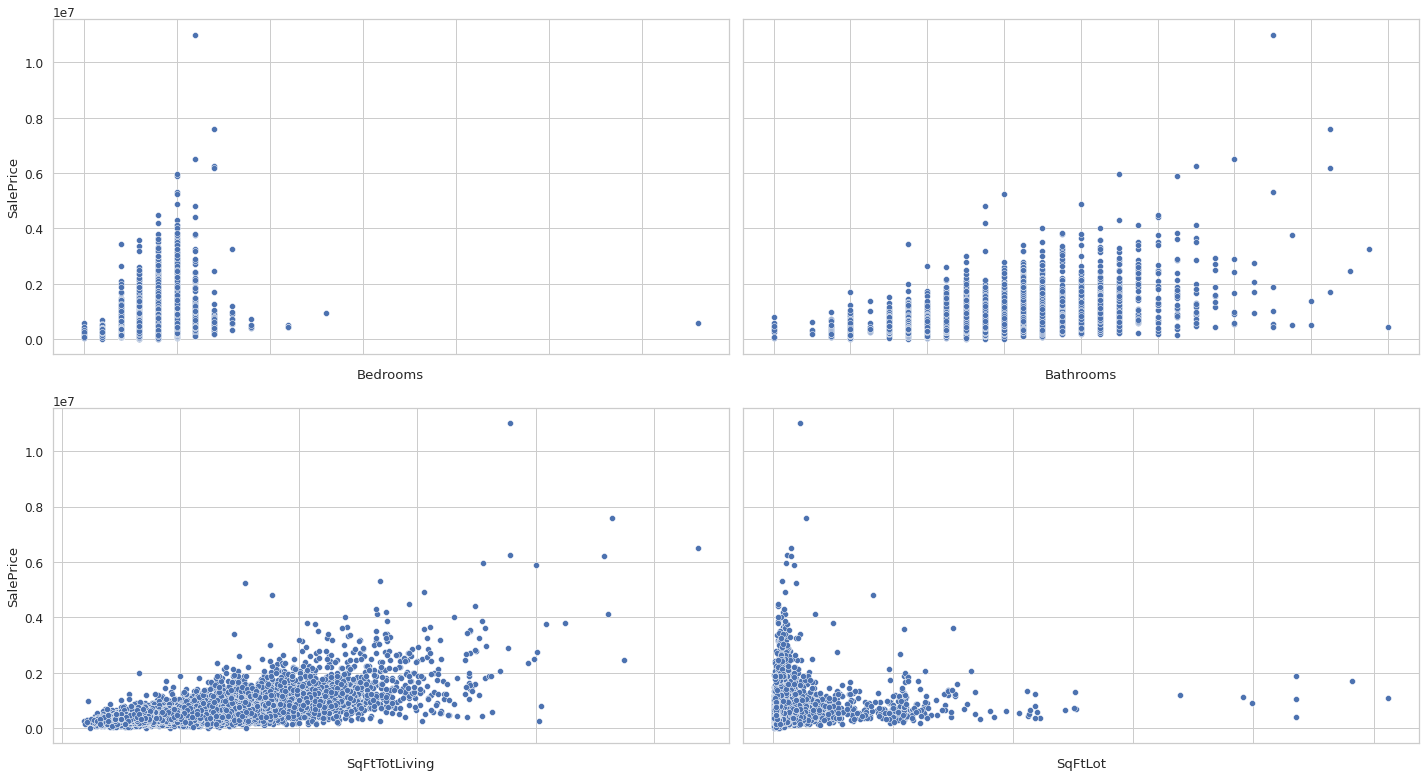

In [ ]:
plot_Sale_Price_by_Variable(df_copy1, list(x_cols))

In [ ]:
## Apply Scaling, Standardization and Normalization on Numeric colmns

def min_max_scaling(dset, minval =0, maxval = 1 ,usescikit=False):
  from sklearn.preprocessing import MinMaxScaler
  if usescikit == False :    
    # apply the min-max scaling in Pandas using the .min() and .max() methods
    #print ( 'path 1.0 \n')
    # copy the dataframe
    df_norm = dset.copy()
    if ( (minval==0) & (maxval == 1) ):
      ##print ( 'path1.1 \n')
      '''for column in df_norm.columns:        
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min()) 
      '''
      df_norm = (dset-dset.min())/(dset.max()-dset.min())
    else:
        #print ( 'path1.2 \n')
        for column in df_norm.columns:
          x, y = df_norm[column].min(),  df_norm[column].max()
          ##  df_norm[column] = (df_norm[column] - minval) / (maxval - minval)
          df_norm[column]  = (df_norm[column]  -  df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())  * (maxval - minval) + minval
  else :   
    # apply the min-max scaling using scikit MinMaxScaler
    ##print ( 'path 2.0 using scikit MinMaxScaler\n')   
    # create a scaler object
    scaler = MinMaxScaler(feature_range=(minval, maxval))
    # fit and transform the data
    df_norm = pd.DataFrame(scaler.fit_transform(dset), columns=dset.columns)
  return df_norm

def ZScore_Standarization_Scaling(dset,usescikit=False):
  from sklearn.preprocessing import StandardScaler

  if usescikit == False :    
    # apply the z-score method in Pandas using the .mean() and .std() methods
    # copy the dataframe
    df_norm = dset.copy()
    for column in dset.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].mean()) / df_norm[column].std()        
    return df_norm
  else :   
    # apply the min-max scaling using scikit MinMaxScaler
    ##print ( 'path 2.0 using scikit MinMaxScaler\n')   
    # create a scaler object
    scaler = StandardScaler()
    # fit and transform the data
    df_norm = pd.DataFrame(scaler.fit_transform(dset), columns=dset.columns)
    return df_norm
def robust_scaling ( df):
  from sklearn import preprocessing
  num_features = df.select_dtypes([np.number]).columns.tolist()
  df_copy1 = pd.DataFrame ( df, columns=list(num_features))  
  r_scaler = preprocessing.RobustScaler()
  df_r = r_scaler.fit_transform(df_copy1)
  col_names = list(df_copy1.columns)
  df_r = pd.DataFrame(df_r , columns=col_names )
  return df_r
def Normalization_Method ( dset):
  from sklearn import preprocessing
  num_features = dset.select_dtypes([np.number]).columns.tolist()
  df_copy1 = pd.DataFrame ( dset, columns=list(num_features))  
  n_scaler = preprocessing.RobustScaler()
  df_normalized = n_scaler.fit_transform(df_copy1)
  col_names = list(df_copy1.columns)
  df_normalized = pd.DataFrame(df_normalized , columns=col_names )
  return df_normalized

def Plot_Scalling_Variations(dset) :
  num_features = dset.select_dtypes([np.number]).columns.tolist()
  ##print ( num_features)
  lst_ScaleTypes = ['None', 'MinMax' , 'Roburst', 'Standard', 'Normalize']
  ##lst_ScaleTypes = ['None']
  fig, axes_types = plt.subplots( ncols=  len(lst_ScaleTypes), figsize=(30,10))
  strTitle = 'Test'
  for i, axes_Type in enumerate(fig.axes):
    strTitle = ""
    lst_scaletype = lst_ScaleTypes[i]
    if lst_scaletype == 'None':
      df_New = pd.DataFrame ( dset, columns=list(num_features))
      strTitle = 'Original Distributions'
    elif lst_scaletype == 'MinMax':
      df_New = min_max_scaling ( dset , usescikit=True )
      strTitle = 'MinMax Scaler / ReScaling - Data Normalization'
    elif lst_scaletype == 'Standard':
      df_New = ZScore_Standarization_Scaling ( dset ,usescikit=True )
      strTitle = 'Standar Scaler / Z-Score Normalization'
    elif lst_scaletype == 'Roburst':
      df_New  =  robust_scaling ( dset)
      strTitle = 'Roburst Scaling'
    else:
      ## lst_scaletype == 'Normalize':
      df_New =  Normalization_Method ( dset)
      strTitle = 'Scikit Normalizer'
    ##sns.distplot(df_New, hist=False, kde=True, rug=True, ax=axes_Type)
    axes_Type.set_title (strTitle)
    for col in num_features:
      ##print(col)
      sns.kdeplot( df_New[col] , ax = axes_Type)
    plt.legend ( num_features )


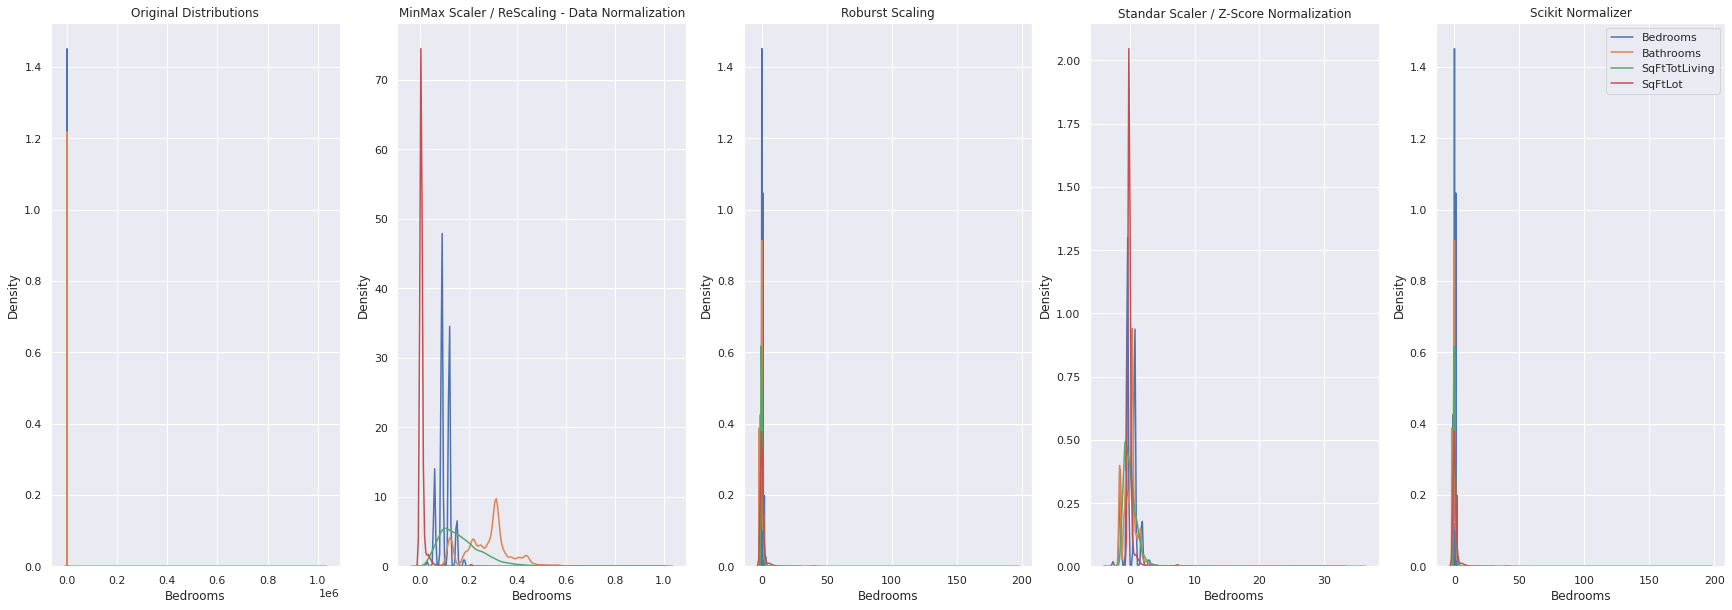

In [ ]:
df_copy2 = pd.DataFrame ( df_copy1, columns=list(x_cols))

df_copy2.head()
Plot_Scalling_Variations ( df_copy2)

## Step 3 - Shape Data

In [ ]:
print("\nFinding correlation between features \n")
# Finding the relations between the variables.
hd_corr_matrix= df_copy1.corr()

saleprice_corr = hd_corr_matrix['SalePrice']

print ( "All feature correlation values \n", hd_corr_matrix)

print ( "\nSalePrice correction with other features\n",  saleprice_corr.sort_values(ascending=False))

print ( "\nTop 5 features positively impacted by SalePrice \n" ,  hd_corr_matrix['SalePrice'].sort_values(ascending=False)[:5], '\n')
print ( "\nBottom 5 features negatively impacted by sale price \n" , hd_corr_matrix['SalePrice'].sort_values(ascending=False)[-5:])

for k,v in saleprice_corr.items():
    if(abs(v) > 0.01) and k != 'SalePrice':
        neg = ''
        if(v < 0):
            neg = 'negative '
        print(f'\nThe {k} aspect shows {(v ** 2) * 100:.2f}% {neg}influence on the Sale Price')


Finding correlation between features 

All feature correlation values 
                SalePrice  Bedrooms  Bathrooms  SqFtTotLiving  SqFtLot
SalePrice        1.00000   0.31976    0.51598        0.68257  0.14204
Bedrooms         0.31976   1.00000    0.53482        0.61834  0.07936
Bathrooms        0.51598   0.53482    1.00000        0.74976  0.10372
SqFtTotLiving    0.68257   0.61834    0.74976        1.00000  0.20726
SqFtLot          0.14204   0.07936    0.10372        0.20726  1.00000

SalePrice correction with other features
 SalePrice       1.00000
SqFtTotLiving   0.68257
Bathrooms       0.51598
Bedrooms        0.31976
SqFtLot         0.14204
Name: SalePrice, dtype: float64

Top 5 features positively impacted by SalePrice 
 SalePrice       1.00000
SqFtTotLiving   0.68257
Bathrooms       0.51598
Bedrooms        0.31976
SqFtLot         0.14204
Name: SalePrice, dtype: float64 


Bottom 5 features negatively impacted by sale price 
 SalePrice       1.00000
SqFtTotLiving   0.68257
Bath

Show Correlation Matrix between features 



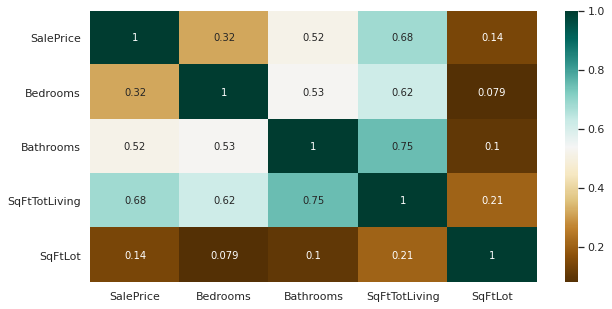

In [ ]:
print ( 'Show Correlation Matrix between features \n')
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches

sns.heatmap(hd_corr_matrix,cmap="BrBG",annot=True, ax=ax)

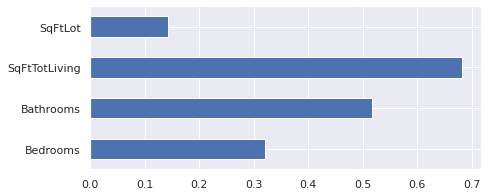

In [ ]:
saleprice_corr = saleprice_corr.drop(labels=['SalePrice'])
# Plot a bar chart to show the influence factors
sns.set(palette="deep", rc={"figure.figsize": [7, 3]})
saleprice_corr.plot(kind='barh')

In [ ]:
#Transform the data set into a data frame 
df_x = pd.DataFrame(house_sales, columns = x_cols)
df_y = pd.DataFrame(house_sales.SalePrice)

print( "Size of \nX :{}  \nY :{}".format(  df_x.shape ,  df_y.shape  )  )
print( "variables \n :{}  \nTarget :{}".format(  x_cols ,  'SalePrice' )  )

Size of 
X :(27063, 4)  
Y :(27063, 1)
variables 
 :['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot']  
Target :SalePrice


## Step 5 : Do Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## split the data 
X_train , X_test , y_train , y_test = train_test_split(df_x , df_y, test_size = 0.20)



print( "Size of \nX_train :{}  Y_train :{} \nX_test :{}  Y_test :{}".format(  X_train.shape ,  y_train.shape , X_test.shape, y_test.shape )  )

print ("Running Linear Regression")
##func_run_linear_Reg(x_train, y_train, x_test, y_test, cols=x_cols)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
#Print the coefecients/weights for each feature/column of our model
print ("\t\tFor {} \n\t\t\t\tcoefficients or slope : {} ".format( x_cols, lr.coef_ )   )
print ('\t\tintercept: ', lr.intercept_)
print ("\n\t\tR^2( coefficient of determination ) :", model.score(X_test, y_test))
#print our price predictions on our test data
y_pred = lr.predict(x_test)
###print(y_pred)

# Two different ways to check model performance/accuracy using,
# mean squared error which tells you how close a regression line is to a set of points.
# Mean squared error by sklearn 
# Resource: https://stackoverflow.com/questions/42453875/precision-score-and-accuracy-score-showing-value-error?rq=1
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print ('\n\t\tMSE :', mse)
print ('\t\tRMSE :', rmse)
print ('\t\tMAE :', mae)

Size of 
X_train :(21650, 4)  Y_train :(21650, 1) 
X_test :(5413, 4)  Y_test :(5413, 1)
Running Linear Regression
		For ['Bedrooms', 'Bathrooms', 'SqFtTotLiving', 'SqFtLot'] 
				coefficients or slope : [[-6.50124397e+04  1.82425196e+04  2.79971166e+02 -7.39062359e-02]] 
		intercept:  [96966.44110394]

		R^2( coefficient of determination ) : 0.486550524073863

		MSE : 157585805758.19748
		RMSE : 396970.78703375324
		MAE : 269156.752408058


## Step 6 : Plot the Actual vs Predicted Price

Size of 
X_train :(21650, 4)  Y_train :(21650, 1) 
X_test :(5413, 4)  Y_test :(5413, 1) 
 Y_Predit:(5413, 1)


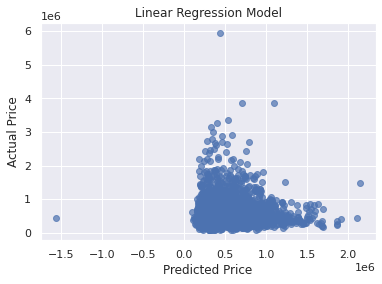

In [113]:

print( "Size of \nX_train :{}  Y_train :{} \nX_test :{}  Y_test :{} \n Y_Predit:{}".format(  X_train.shape ,  y_train.shape , X_test.shape, y_test.shape , y_pred.shape )  )


%matplotlib inline
import matplotlib.pyplot as plt

actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.7, color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()